In [60]:
!pip install gurobipy
from gurobipy import *
import numpy as np
import matplotlib.pyplot as plt



---

Modelo no lineal en Gurobi

In [62]:
data = np.genfromtxt("data.csv",delimiter = ",")

m = Model('Modelo No Lineal')
A_1 = m.addVar(lb=-100.0, ub=100.0, name="A")
B_1 = m.addVar(lb=-100.0, ub=100.0, name="B")

#Función Objetivo del modelo no lineal:
N = len(data)
F = quicksum( A_1*data[i,0] + B_1 - data[i,1] for i in range(N))

m.setObjective(F**2,GRB.MINIMIZE)
m.optimize()

print("# ----- Soluciones Modelo No Lineal ------ #")
print(" Valor de A:" ,A_1.x)
print(" Valor de B:",B_1.x)

Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (linux64)

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 0 rows, 2 columns and 0 nonzeros
Model fingerprint: 0x0503a3a4
Model has 3 quadratic objective terms
Coefficient statistics:
  Matrix range     [0e+00, 0e+00]
  Objective range  [2e+06, 1e+08]
  QObjective range [2e+04, 5e+07]
  Bounds range     [1e+02, 1e+02]
  RHS range        [0e+00, 0e+00]
Presolve time: 0.02s
Presolved: 0 rows, 2 columns, 0 nonzeros
Presolved model has 3 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 1
 AA' NZ     : 0.000e+00
 Factor NZ  : 1.000e+00
 Factor Ops : 1.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0  -1.39878409e+12  1.12285464e+08  1.63e+03 1.31e

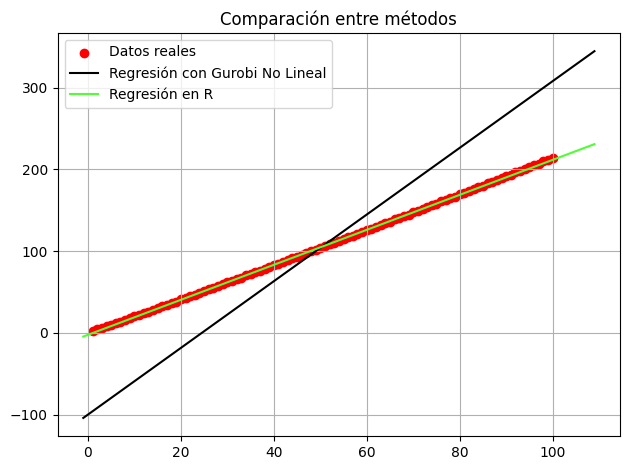

In [63]:

def F(a,b,x):
    return a*x + b

plt.scatter(data[:,0], data[:,1], c = 'r', label = "Datos reales")

plt.plot(range(-1,110), [F(A_1.x, B_1.x, x) for x in range(-1,110)],
         c = "black",
         label = 'Regresión con Gurobi No Lineal')

plt.plot(range(-1,110), [F(2.14, -2.40, x) for x in range(-1,110)],
         c = "#4FFF33",
         label = "Regresión en R")


plt.legend()
plt.grid()
plt.title("Comparación entre métodos")
plt.tight_layout()



---
Forma Lineal


In [65]:
m = Model('Modelo Lineal')
A_2 = m.addVar(lb=-100.0, ub=100.0, name="A_2")
B_2 = m.addVar(lb=-100.0, ub=100.0, name="B_2")
E = m.addVar(lb=0, ub=100.0, name = "E")

# Número de datos
N = len(data)

# Restricciones
m.addConstrs(A_2*data[i,0] + B_2 - data[i,1] <= E for i in range(N))
m.addConstrs(A_2*data[i,0] + B_2 - data[i,1] >= -1*E for i in range(N))

#Función Objetivo del modelo no lineal:

m.setObjective(E,GRB.MINIMIZE)
m.optimize()

print("# ----- Soluciones Modelo Lineal ------ #")
print(" Valor de A:" ,A_2.x)
print(" Valor de B:",B_2.x)

Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (linux64)

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 200 rows, 3 columns and 600 nonzeros
Model fingerprint: 0x31fcaabd
Coefficient statistics:
  Matrix range     [1e+00, 1e+02]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+02, 1e+02]
  RHS range        [2e+00, 2e+02]
Presolve time: 0.01s
Presolved: 200 rows, 3 columns, 600 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   2.682642e+04   0.000000e+00      0s
       7    1.8712121e+00   0.000000e+00   0.000000e+00      0s

Solved in 7 iterations and 0.02 seconds (0.00 work units)
Optimal objective  1.871212121e+00
# ----- Soluciones Modelo No Lineal ------ #
 Valor de A: 2.1383838383838385
 Valor de B: -1.5095959595959558


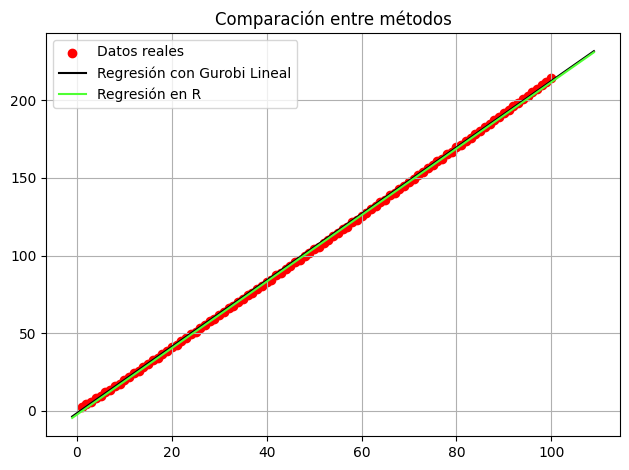

In [66]:
def F(a,b,x):
    return a*x + b

plt.scatter(data[:,0], data[:,1], c = 'r', label = "Datos reales")

plt.plot(range(-1,110), [F(A_2.x, B_2.x, x) for x in range(-1,110)],
         c = "black",
         label = "Regresión con Gurobi Lineal")

plt.plot(range(-1,110), [F(2.14, -2.40, x) for x in range(-1,110)],
         c = "#4FFF33",
         label = "Regresión en R")


plt.legend()
plt.grid()
plt.title("Comparación entre métodos")
plt.tight_layout()